<a href="https://colab.research.google.com/github/Yamm23/Gold-Prediction-ML-/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/LearningAI_CSV/HousePrice/house_price_regression_dataset.csv")


In [2]:
#Finding the current year and then calculating the age
import datetime
current_year = int(datetime.date.today().strftime("%Y"))
data['Age'] = current_year - data['Year_Built']

In [3]:
df = data[['Square_Footage','Num_Bedrooms','Num_Bathrooms','Lot_Size','Garage_Size','House_Price','Age']]
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,House_Price,Age
0,1360,2,1,0.599637,0,2.623829e+05,44
1,4272,3,3,4.753014,1,9.852609e+05,9
2,3592,1,2,3.634823,0,7.779774e+05,9
3,966,1,2,2.730667,1,2.296989e+05,48
4,4926,2,1,4.699073,0,1.041741e+06,32
...,...,...,...,...,...,...,...
995,3261,4,1,2.165110,2,7.014940e+05,47
996,3179,1,2,2.977123,1,6.837232e+05,26
997,2606,4,2,4.055067,0,5.720240e+05,63
998,4723,5,2,1.930921,0,9.648653e+05,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  1000 non-null   int64  
 1   Num_Bedrooms    1000 non-null   int64  
 2   Num_Bathrooms   1000 non-null   int64  
 3   Lot_Size        1000 non-null   float64
 4   Garage_Size     1000 non-null   int64  
 5   House_Price     1000 non-null   float64
 6   Age             1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [5]:
df.shape

(1000, 7)

In [6]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,House_Price,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,2815.422000,2.990000,1.973000,2.778087,1.022000,6.188610e+05,38.450000
std,1255.514921,1.427564,0.820332,1.297903,0.814973,2.535681e+05,20.632916
min,503.000000,1.000000,1.000000,0.506058,0.000000,1.116269e+05,3.000000
25%,1749.500000,2.000000,1.000000,1.665946,0.000000,4.016482e+05,20.750000
50%,2862.500000,3.000000,2.000000,2.809740,1.000000,6.282673e+05,39.000000
75%,3849.500000,4.000000,3.000000,3.923317,2.000000,8.271413e+05,56.000000
max,4999.000000,5.000000,3.000000,4.989303,2.000000,1.108237e+06,75.000000


<Axes: >

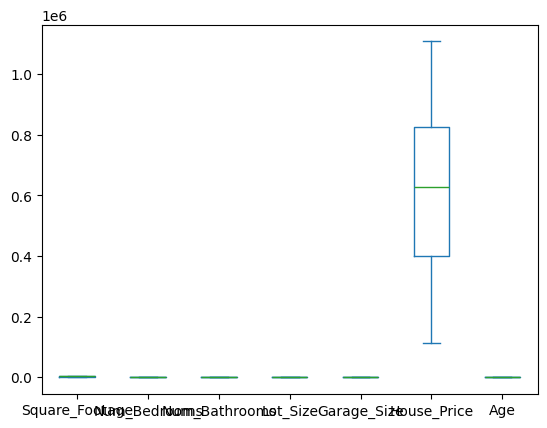

In [7]:
#Checking the boxplot to see if there is any outliers
df.plot.box()

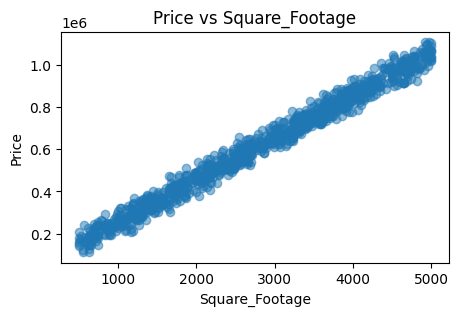

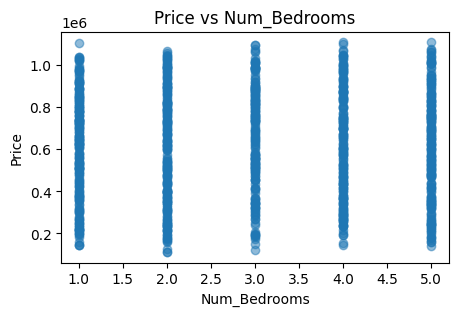

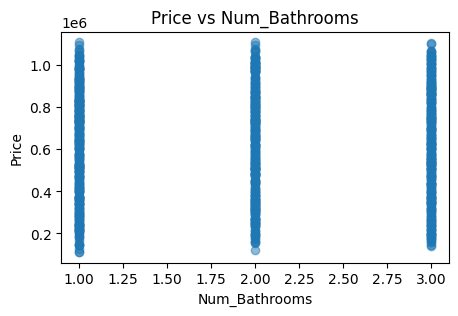

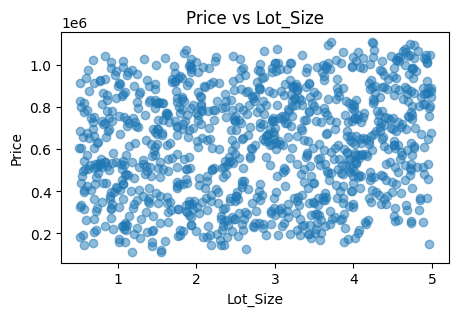

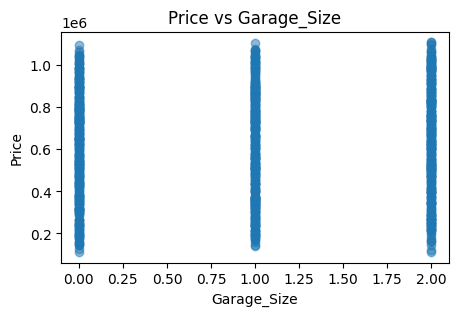

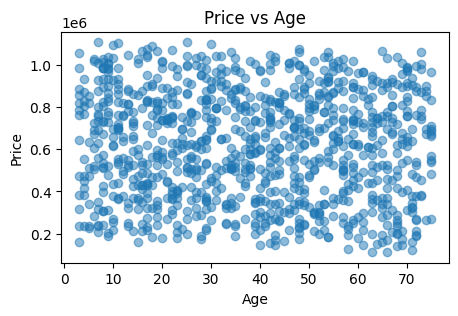

In [8]:
features = ['Square_Footage','Num_Bedrooms','Num_Bathrooms','Lot_Size','Garage_Size','Age']
for feature in features:
  plt.figure(figsize=(5, 3))
  plt.scatter(df[feature], df['House_Price'], alpha=0.5)
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.title(f'Price vs {feature}')
  plt.show()

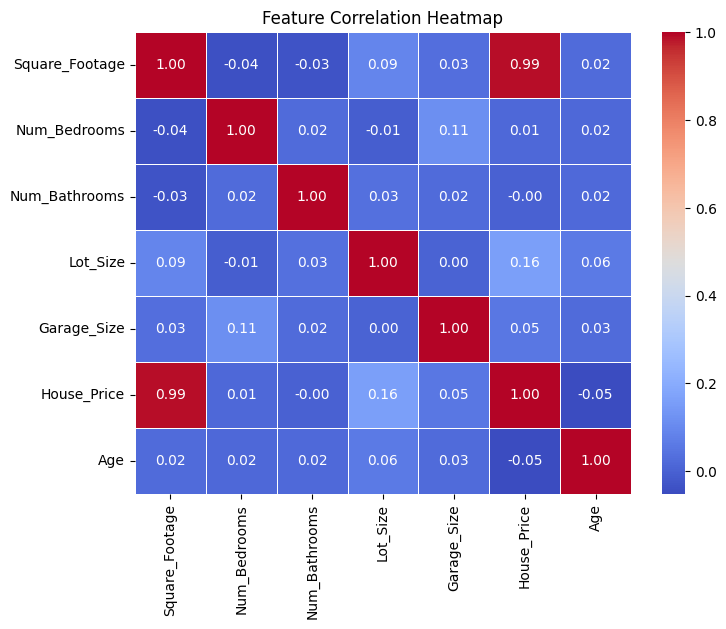

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
X = df[['Square_Footage']]
y = df['House_Price']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [13]:
model.fit(X_train.values,y_train.values)

LinearRegression()

In [14]:
prediction = model.predict(X_test)
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 221012.77244162,  892496.69365014,  300779.11496699,
        404857.11352654,  665253.03270256,  567805.48578869,
        854924.13432459,  367686.39975527,  771139.33625638,
        921831.41911287,  563787.03024585,  803889.74893053,
       1020082.65713531,  631096.16058842,  259188.1000986 ,
        696797.90871385,  698807.13648527,  841060.4627018 ,
        180426.37145894,  345383.97149251,  674696.40322823,
        955988.29122701,  707446.81590237,  358845.79756103,
        992556.23666685,  953577.21790131,  563184.26191443,
        641343.22222266,  663645.65048542,  988738.70390116,
        308012.3349441 ,  697802.52259956,  830612.47829041,
        803487.90337624,  899729.91362726, 1044394.31316949,
        475782.85385766,  985122.0939126 ,  818758.03443903,
        320871.39268119,  269033.31617856,  825388.48608472,
        615826.02952563,  935293.24518139,  987533.1672383 ,
        195093.73419031,  311227.09937837,  856531.51654173,
        547110.43974307,

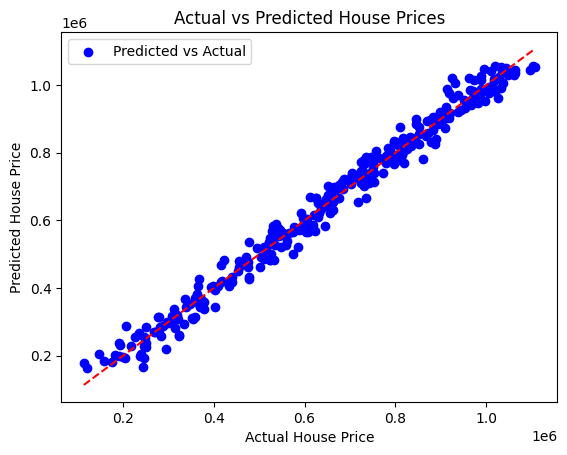

In [15]:
plt.scatter(y_test, prediction, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(prediction,y_test)
mae

25490.28464444582

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(prediction,y_test)
mse

1024462500.3558439

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(prediction,y_test)
r2

0.9841522370494689

In [19]:
df['House_Price'].max()

1108236.8362913695

In [22]:
prediction1 = model.predict([[4991]])
prediction1

array([1056047.83424372])